In [2]:
import osmnx as ox
import networkx as nx 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

In [3]:
point = (-0.206412, -78.499363)

## Pruebas con networkx

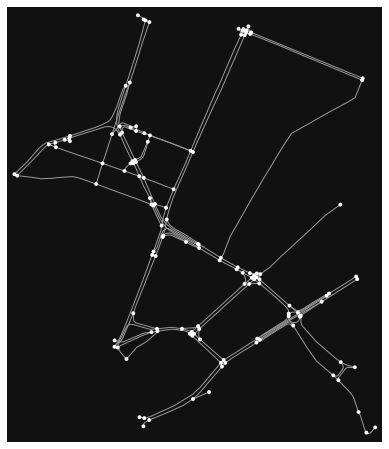

In [4]:
filtro = '["highway"~"primary|secondary|tertiary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

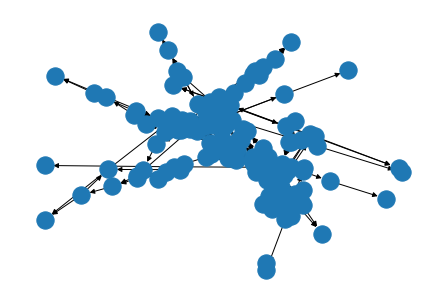

In [5]:
nx.draw(graph) 

In [5]:
g_nodes = list(graph.nodes)

In [8]:
g_nodes[:5]

[264268562, 264268564, 264268569, 264270346, 264270354]

In [12]:
graph.nodes[264268562]

{'y': -0.2022214, 'x': -78.5005984, 'street_count': 4}

In [6]:
positions_x = nx.get_node_attributes(graph,'x')
positions_y = nx.get_node_attributes(graph,'y')

In [7]:
positions = {}
colors = []
for node_name in g_nodes:
    positions[node_name] = (graph.nodes[node_name]['x'],graph.nodes[node_name]['y'])
    colors.append('red')

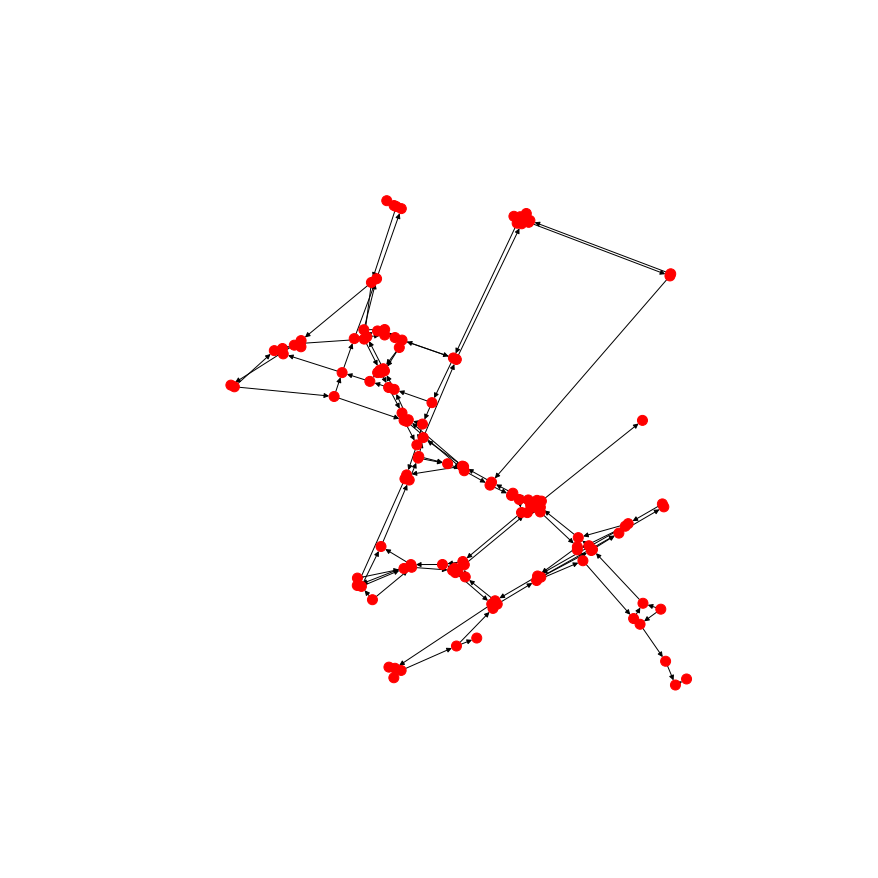

In [41]:
plt.figure(figsize=(12,12))
nx.draw(graph,positions,node_size=100,node_color=colors)

In [22]:
positions[264268562]

-78.5005984

In [30]:
graph.nodes[264268562]


{'y': -0.2022214, 'x': -78.5005984, 'street_count': 4, 'color': 'red'}

In [29]:
graph.nodes[264268562]['color']='red'

## Normailzando el dataset

In [8]:
positions_for_data={'nodos':positions.keys(),'position_x':positions_x.values(),'position_y':positions_y.values()}

In [9]:
data = pd.DataFrame.from_dict(positions_for_data)

In [10]:
data.head()

,nodos,position_x,position_y
0,264268562,-78.500598,-0.202221
1,264268564,-78.500014,-0.202610
2,264268569,-78.498284,-0.203269
3,264270346,-78.490999,-0.200246
4,264270354,-78.490973,-0.200167


In [11]:
graph.nodes[264268562]

{'y': -0.2022214, 'x': -78.5005984, 'street_count': 4}

In [25]:
data_norm = data[['position_x','position_y']]

In [27]:
data.columns[1]

'position_x'

In [30]:
data_norm.head()

,position_x
0,-78.500598
1,-78.500014
2,-78.498284
3,-78.490999
4,-78.490973


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['position_x','position_y']])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1
0,0.337477,0.733994
1,0.375606,0.712202
2,0.488407,0.675279
3,0.963587,0.844634
4,0.965237,0.849082


In [29]:
data_scaled = normalize(data_norm)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


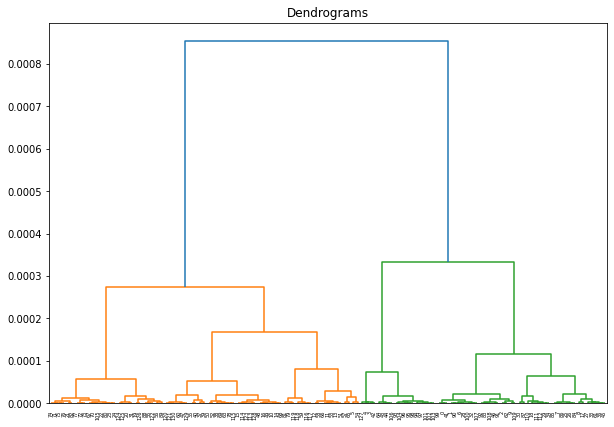

In [98]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [37]:
from sklearn.cluster import AgglomerativeClustering


In [38]:
#euclidean affinity
cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')  
colors_num = cluster.fit_predict(data_scaled)

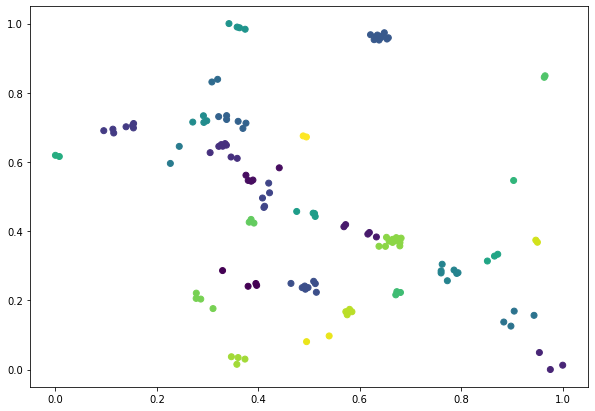

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[0], data_scaled[1], c=cluster.labels_)

In [116]:
len(colors_num)

131

In [111]:
type(colors_num)

numpy.ndarray

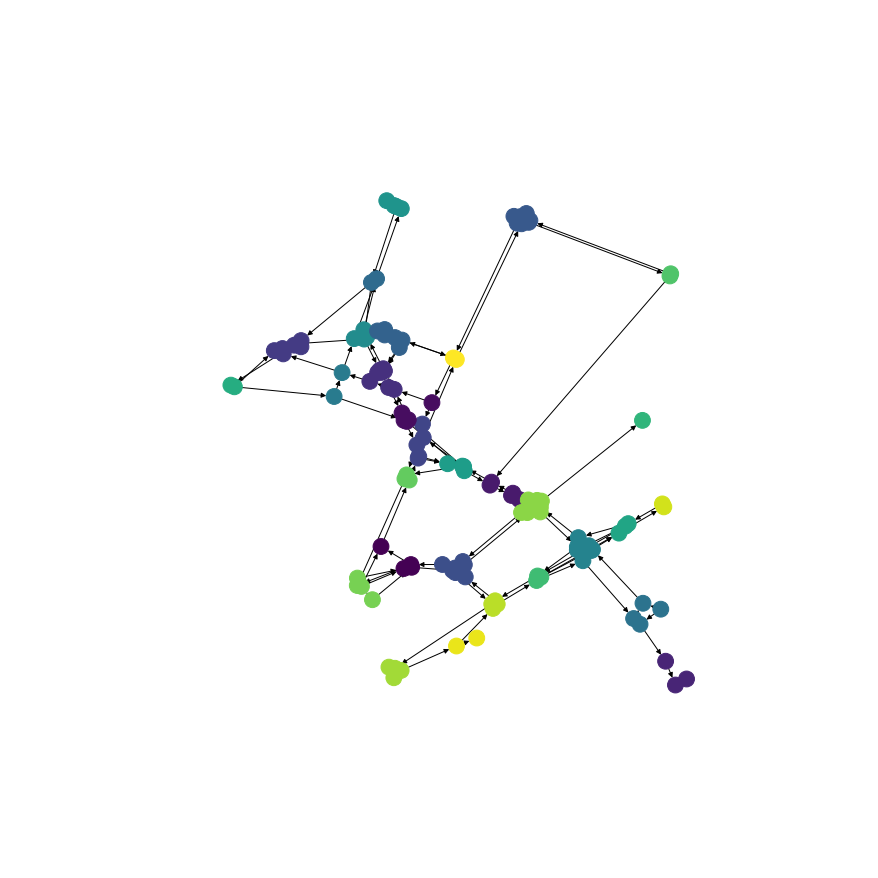

In [41]:
plt.figure(figsize=(12,12))
nx.draw(graph,positions,node_size=250,node_color=colors_num)

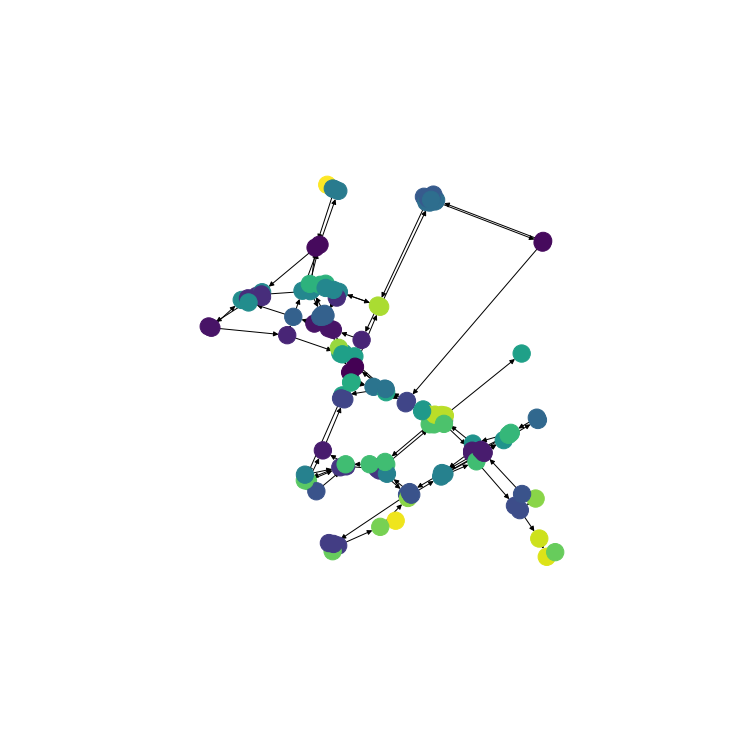

In [119]:
#euclidean affinity
cluster = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')  
colors_num = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10,10))
nx.draw(graph,positions,node_size=300,node_color=colors_num)

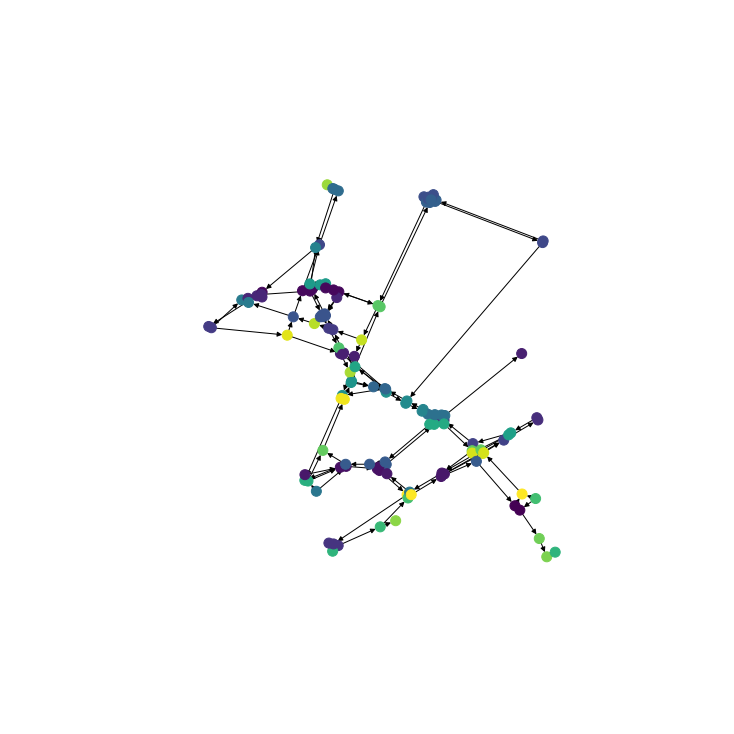

In [124]:
#euclidean affinity
cluster = AgglomerativeClustering(n_clusters=47, affinity='euclidean', linkage='ward')  
colors_num = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10,10))
nx.draw(graph,positions,node_size=100,node_color=colors_num)